## 1. Data preparation

In [384]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### 1.1 Loading and Looking at the Data structure

In [385]:
dataset = pd.read_csv('data/titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [386]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [387]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1.2 Null values

In [388]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 1.3 Creating a testset

In [389]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1,
                              test_size = 0.2,
                              random_state=42)

for train_index, test_index in split.split(dataset, dataset['Survived']):
    train_set = dataset.loc[train_index]
    test_set = dataset.loc[test_index]

## 2. Data Visualization and Discovery

In [390]:
titanic = train_set.copy()

In [391]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 692 to 507
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          575 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        160 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


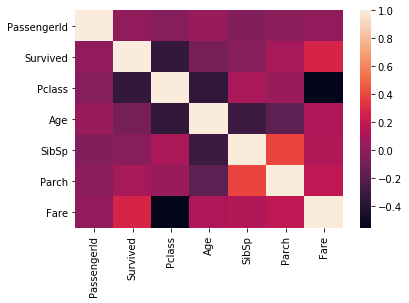

In [392]:
sns.heatmap(titanic.corr())

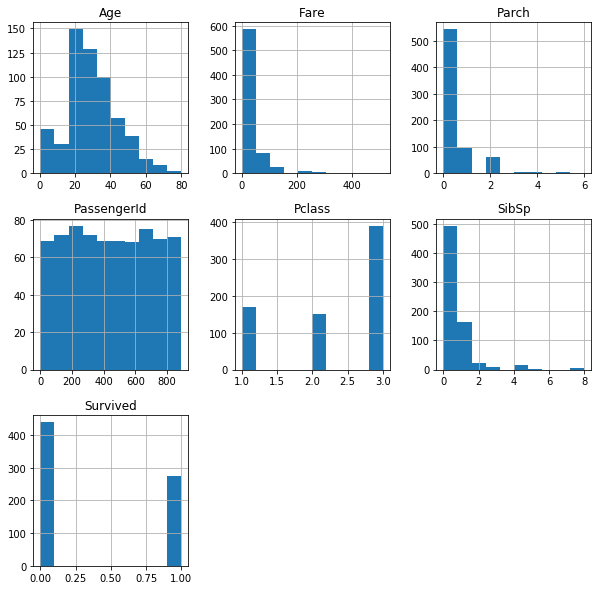

In [393]:
titanic.hist(figsize=(10, 10))

plt.show()

## 3. Preparing Data for Algorithms

### Selecting Features to work with.

In [394]:
CAT_FEATURES = ['Sex', 'Embarked', 'Pclass']
NUM_FEATURES = ['Age', 'SibSp', 'Parch']
FEATURES = CAT_FEATURES + NUM_FEATURES
LABELS = ['Survived']

In [395]:
titanic = titanic[FEATURES]

### 3.1 Cleaning

In [396]:
# Null values

titanic.isna().sum()

Sex           0
Embarked      2
Pclass        0
Age         137
SibSp         0
Parch         0
dtype: int64

In [397]:
titanic.dropna(subset=['Embarked'], inplace=True)

In [398]:
titanic.isna().sum()

Sex           0
Embarked      0
Pclass        0
Age         137
SibSp         0
Parch         0
dtype: int64

### 3.2 Imputation

In [399]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

In [400]:
titanic[NUM_FEATURES] = imputer.fit_transform(titanic[NUM_FEATURES])

In [401]:
titanic.isna().any()

Sex         False
Embarked    False
Pclass      False
Age         False
SibSp       False
Parch       False
dtype: bool

### 3.3 Adding new Features

In [402]:
def age_type(val):
    if val <= 12: return 'Child'
    elif 12 < val < 21: return 'Teenager'
    elif 20 < val < 50: return 'Adult'
    return 'Old'
CAT_FEATURES += ['Agetype']
titanic['Agetype'] = titanic['Age'].apply(age_type)

In [403]:
titanic.head()

,Sex,Embarked,Pclass,Age,SibSp,Parch,Agetype
692,male,S,3,28.5,0.0,0.0,Adult
481,male,S,2,28.5,0.0,0.0,Adult
527,male,S,1,28.5,0.0,0.0,Adult
855,female,S,3,18.0,0.0,1.0,Teenager
801,female,S,2,31.0,1.0,1.0,Adult


### 3.4 Categorical Features

In [404]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()

In [405]:
one_hot.fit_transform(titanic[CAT_FEATURES]).toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [406]:
titanic.Agetype.value_counts()

Adult       509
Teenager     88
Old          58
Child        55
Name: Agetype, dtype: int64

### 3.5 Transformation Pipelines

In [407]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Individual Pipelines
num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median'))])   
cat_pipe = Pipeline([('one_hot', OneHotEncoder())])

# Unified Pipeline
full_pipe_line = ColumnTransformer([
    ('num', num_pipe, NUM_FEATURES),
    ('cat', cat_pipe, CAT_FEATURES)
])

In [408]:
# Helper Functions

def age_type(val):
    if val <= 12: return 'Child'
    elif 12 < val < 21: return 'Teenager'
    elif 20 < val < 50: return 'Adult'
    return 'Old'

def prepare_data(dataset, pipeline, features, labels, func=None, get_labels = True):
    # Selecting Features
    dataset.dropna(subset=['Embarked'],inplace=True)
    features = dataset.loc[:,features]
    # Adding New Column
    features['Agetype'] = features['Age'].apply(func)
    if get_labels:
        return pipeline.fit_transform(features), dataset.loc[:, labels]
    return pipeline.fit_transform(features)
    

In [409]:

trainset_prepared, trainset_labels  = prepare_data(train_set, full_pipe_line, FEATURES, LABELS, age_type)

In [410]:
trainset_prepared[:10]

array([[28.5,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ,  0. ,  1. ,
         0. ,  0. ,  1. ,  0. ],
       [28.5,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ,  1. ,  0. ,
         0. ,  0. ,  1. ,  0. ],
       [28.5,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  1. ,  1. ,  0. ,  0. ,
         0. ,  0. ,  1. ,  0. ],
       [18. ,  0. ,  1. ,  1. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  1. ,
         0. ,  0. ,  0. ,  1. ],
       [31. ,  1. ,  1. ,  1. ,  0. ,  0. ,  0. ,  1. ,  0. ,  1. ,  0. ,
         1. ,  0. ,  0. ,  0. ],
       [21. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ,  0. ,  1. ,
         1. ,  0. ,  0. ,  0. ],
       [26. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ,  0. ,  1. ,
         1. ,  0. ,  0. ,  0. ],
       [28.5,  0. ,  0. ,  0. ,  1. ,  1. ,  0. ,  0. ,  1. ,  0. ,  0. ,
         0. ,  0. ,  1. ,  0. ],
       [28.5,  0. ,  0. ,  0. ,  1. ,  0. ,  1. ,  0. ,  0. ,  0. ,  1. ,
         0. ,  0. ,  1. ,  0. ],
       [31. ,  1. ,  0. ,  1. ,  0. ,

## 4. Select and Train a Model

### 4.1 Testing Different Models

In [411]:
def get_scores(model, model_name, X, y):
    print(f"-----{model_name}-------")
    print("Accuracy :", model.score(X, y))

In [412]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

model_name = ['KNN', 'Random Forest', 'Decision Tree', 'Logistic Classifier']
models = [KNeighborsClassifier(), 
          RandomForestClassifier(random_state=42), 
          DecisionTreeClassifier(random_state=42),
          LogisticRegression(solver="saga")]


print("----------------Train Set Predictions-----------------")

for m_name, model in zip(model_name, models):
    print(f"-----{m_name}-------")
    model.fit(trainset_prepared, np.ravel(trainset_labels))
    pred = model.predict(trainset_prepared)
    print('Score :', accuracy_score(trainset_labels, pred))
    print('Confusion Matrix :\n', confusion_matrix(trainset_labels, pred))
    print()

----------------Train Set Predictions-----------------
-----KNN-------
Score : 0.8422535211267606
Confusion Matrix :
 [[394  45]
 [ 67 204]]

-----Random Forest-------
Score : 0.9338028169014084
Confusion Matrix :
 [[424  15]
 [ 32 239]]

-----Decision Tree-------
Score : 0.9338028169014084
Confusion Matrix :
 [[430   9]
 [ 38 233]]

-----Logistic Classifier-------
Score : 0.8
Confusion Matrix :
 [[381  58]
 [ 84 187]]



/home/prakhar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### 4.2 Precision Recall Curve

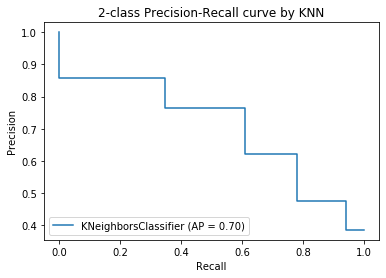

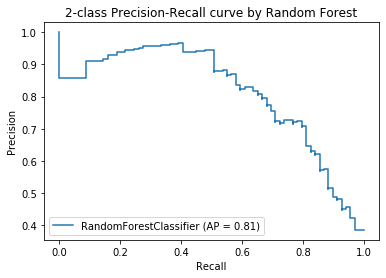

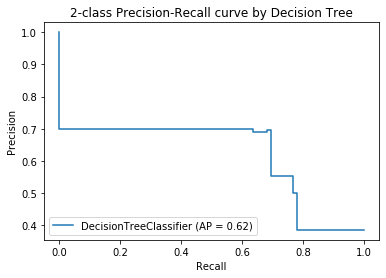

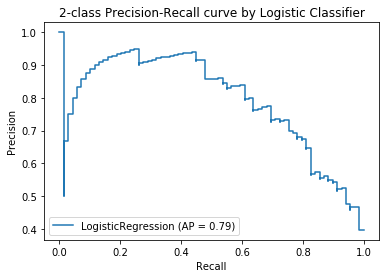

In [413]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

for m_name, model in zip(model_name, models):
    disp = plot_precision_recall_curve(model, testset_prepared, testset_labels)
    disp.ax_.set_title('2-class Precision-Recall curve by {}'.format(m_name))

### 4.3 Cross Validation Score

In [414]:
for m_name, model in zip(model_name, models):
    score = cross_val_score(model, trainset_prepared, np.ravel(trainset_labels), cv=7)
    print(f"-----{m_name}-------")
    print(score)

-----KNN-------
[0.73529412 0.80392157 0.78431373 0.79207921 0.83168317 0.81188119
 0.76237624]
-----Random Forest-------
[0.79411765 0.82352941 0.70588235 0.82178218 0.85148515 0.8019802
 0.8019802 ]
-----Decision Tree-------
[0.76470588 0.80392157 0.69607843 0.79207921 0.83168317 0.78217822
 0.77227723]
-----Logistic Classifier-------
[0.7745098  0.81372549 0.7254902  0.81188119 0.84158416 0.81188119
 0.78217822]


/home/prakhar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/prakhar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/prakhar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/prakhar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/prakhar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma

## 5. Fine Tuning a Model

### 5.1 Grid Search CV 

In [415]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]}
]

forest_reg = RandomForestClassifier()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring = "roc_auc", return_train_score=True)

grid_search.fit(trainset_prepared, np.ravel(trainset_labels))

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [416]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [417]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [418]:
# Scores are also available
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(mean_score), params)

0.8970119845388702 {'max_features': 2, 'n_estimators': 3}
0.9107046225617411 {'max_features': 2, 'n_estimators': 10}
0.9115243177837137 {'max_features': 2, 'n_estimators': 30}
0.8942824436672308 {'max_features': 4, 'n_estimators': 3}
0.9097858498465352 {'max_features': 4, 'n_estimators': 10}
0.9136862189373083 {'max_features': 4, 'n_estimators': 30}
0.896440109848129 {'max_features': 6, 'n_estimators': 3}
0.9060885491171856 {'max_features': 6, 'n_estimators': 10}
0.9085560730802664 {'max_features': 6, 'n_estimators': 30}
0.8943764022831064 {'max_features': 8, 'n_estimators': 3}
0.9110751377645723 {'max_features': 8, 'n_estimators': 10}
0.912401415989014 {'max_features': 8, 'n_estimators': 30}
0.8814808259595377 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.8907035313056566 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.8873332183201407 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.8891606385372007 {'bootstrap': False, 'max_features': 3, 'n_e

In [419]:
grid_search.best_score_

0.8348225066759548

### 5.2 Analysing Errors in the Model

In [420]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances * 100

array([30.186916  ,  7.26532171,  4.59738207, 17.84760107, 15.65490149,
        1.395291  ,  0.81940069,  2.60257011,  5.17404447,  2.4594655 ,
        6.39445013,  1.52476904,  1.58756218,  1.55609524,  0.9342293 ])

### 5.3 Testing the Model on Test Data

Accuracy Score: 0.8156424581005587
Confusion Matrix:
 [[97 13]
 [20 49]]


Text(0.5, 1.0, '2-class Precision-Recall curve by Final RF Model')

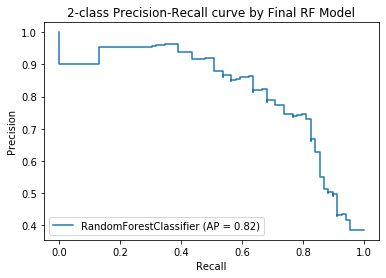

In [421]:
testset_prepared, testset_labels = prepare_data(test_set, full_pipe_line, FEATURES, LABELS, age_type)

final_model = grid_search.best_estimator_

predictions = final_model.predict(testset_prepared)

print('Accuracy Score:', accuracy_score(testset_labels, predictions))
print('Confusion Matrix:\n', confusion_matrix(testset_labels, predictions))

disp = plot_precision_recall_curve(final_model, testset_prepared, testset_labels)
disp.ax_.set_title('2-class Precision-Recall curve by {}'.format('Final RF Model'))

## 6. Preparing for Kaggle Competition

### 6.1 Training on whole data

In [422]:
dataset_prepared, dataset_labels = prepare_data(dataset, full_pipe_line, FEATURES, LABELS, age_type)

In [423]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]}
]

kaggle_rf_model = RandomForestClassifier()

grid_search = GridSearchCV(kaggle_rf_model, param_grid, cv=5, scoring = "roc_auc", return_train_score=True)

grid_search.fit(dataset_prepared, np.ravel(dataset_labels))

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [424]:
grid_search.best_score_

0.8379045037531277

### 6.2 Predicting for competition

In [425]:
testdata = pd.read_csv('data/test.csv')
testdata_prepared = prepare_data(testdata, full_pipe_line, FEATURES, LABELS, age_type, False)

In [437]:
kaggle_model= grid_search.best_estimator_
testdata['Survived'] = kaggle_model.predict(testdata_prepared)

sub = testdata[["PassengerId", 'Survived']]
sub.to_csv("data/submissions.csv", index=False)